# RandomForest

Bias Variance and RandomForest

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


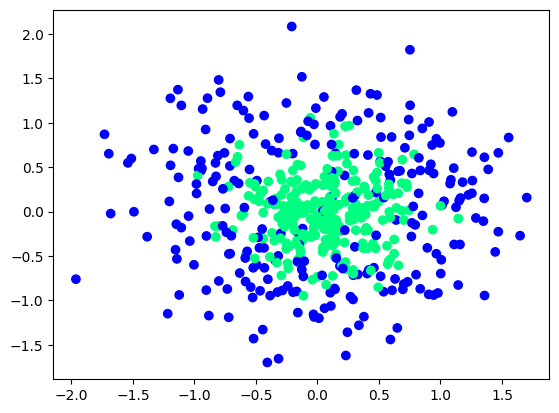

In [5]:
np.random.seed(42)
X,y  = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,y,test_size=0.2)
plt.scatter(X[:,0],X[:,1],c=y ,cmap='winter')

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

<Figure size 1200x800 with 0 Axes>

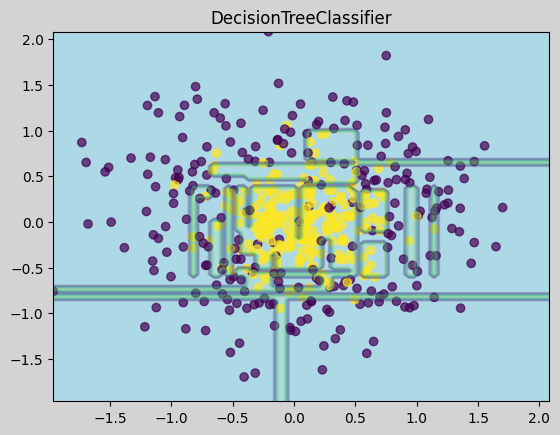

In [ ]:
plt.figure(figsize=(12,8))
plt.figure(facecolor='lightgray')  # Set background color for the entire figure
plt.gca().set_facecolor('lightblue')  # Set background color for axes


X_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 =np.meshgrid(X_range,X_range)
 
y_hat =dt.predict(np.c_[xx1.ravel(),xx2.ravel()])

y_hat =y_hat.reshape(xx1.shape)

plt.contour(xx1,xx2,y_hat,alpha =0.2)
plt.scatter(X[:,0],X[:,1],c=y ,cmap='viridis',alpha =.7)

plt.title("DecisionTreeClassifier")
plt.show()


# overfitting

<Figure size 1200x800 with 0 Axes>

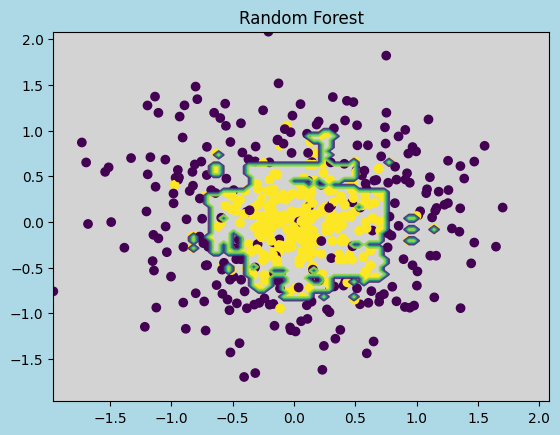

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_train,Y_train)
plt.figure(figsize=(12,8))
plt.figure(facecolor='lightblue')
plt.gca().set_facecolor('lightgray')

X_range =np.linspace(X.min(),X.max(),100)
xx1 ,xx2 =np.meshgrid(X_range,X_range)

y_hat  =rf.predict(np.c_[xx1.ravel(),xx2.ravel()])

y_hat =y_hat.reshape(xx1.shape)

plt.contour(xx1,xx2,y_hat,alpha =.7)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

plt.title("Random Forest")
plt.show()



In [16]:
# random data generation for understanding 
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
     

(-5.0, 5.0)

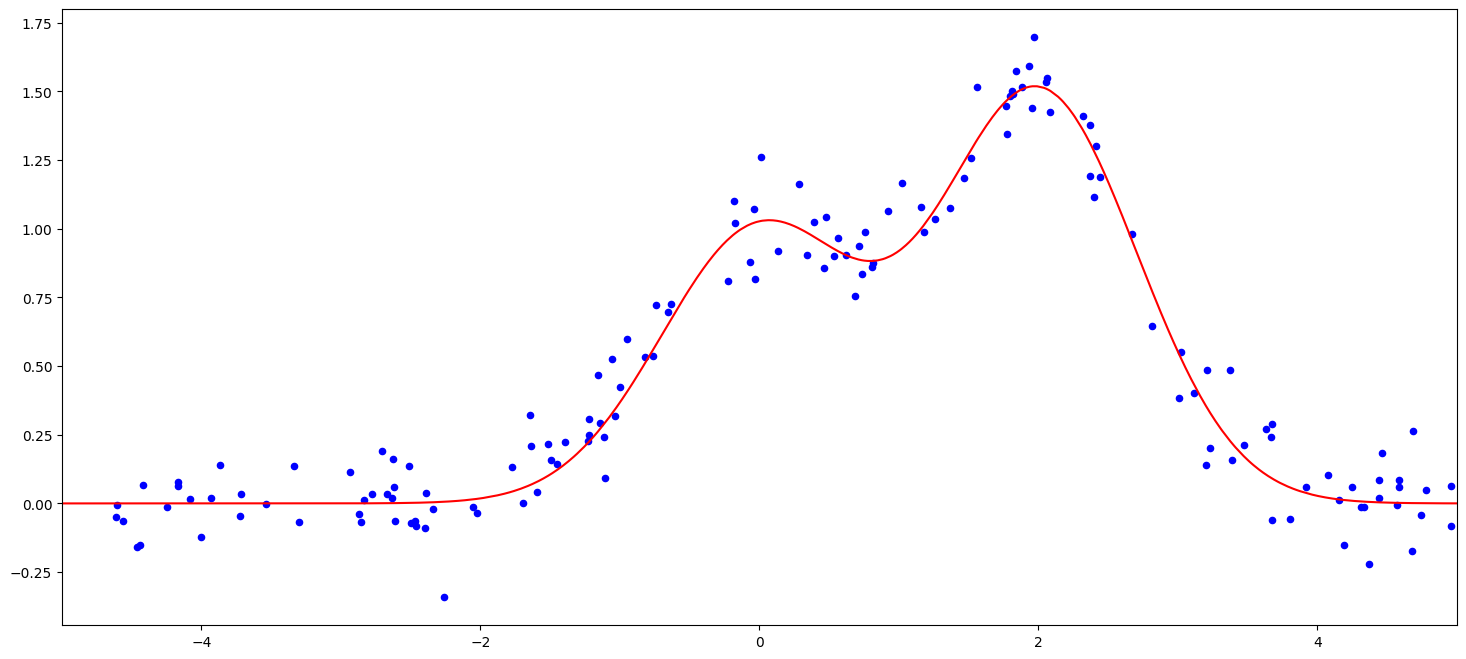

In [17]:


plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 22.70')

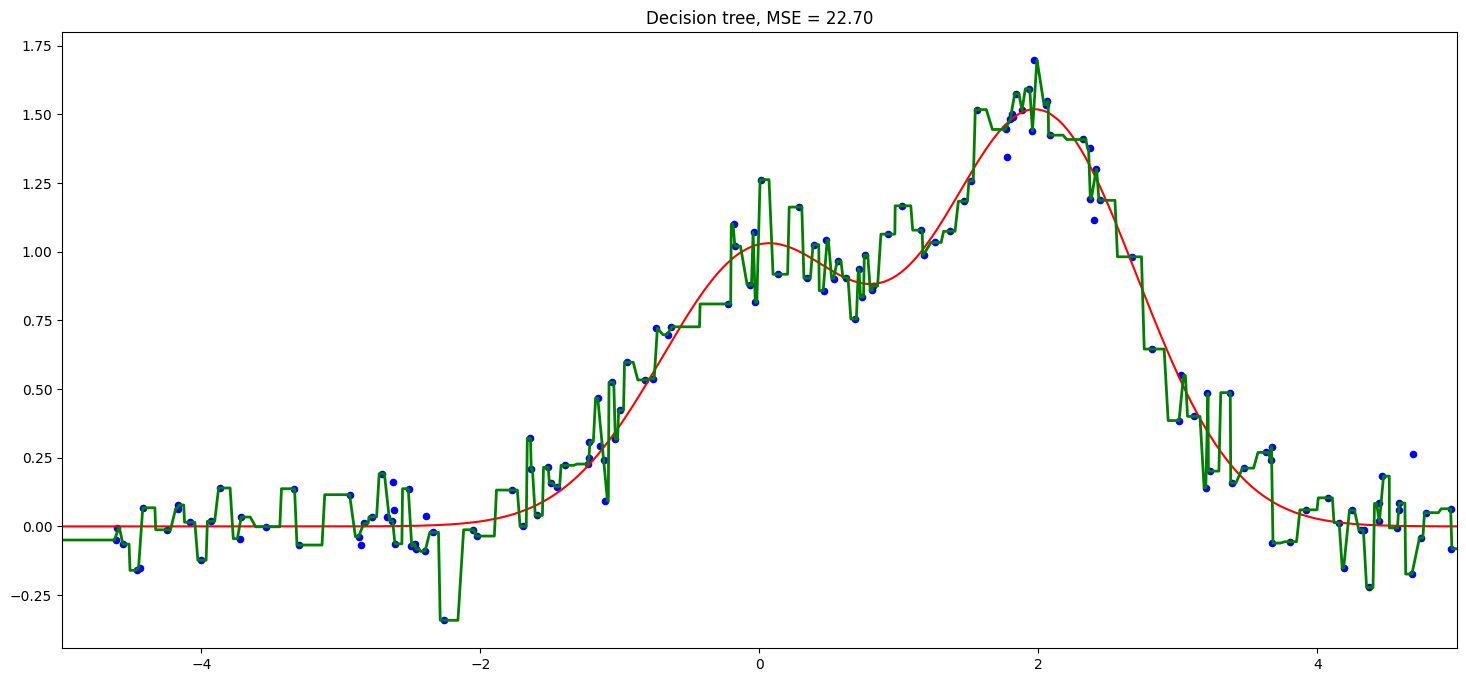

In [18]:
# decision Regressor

# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

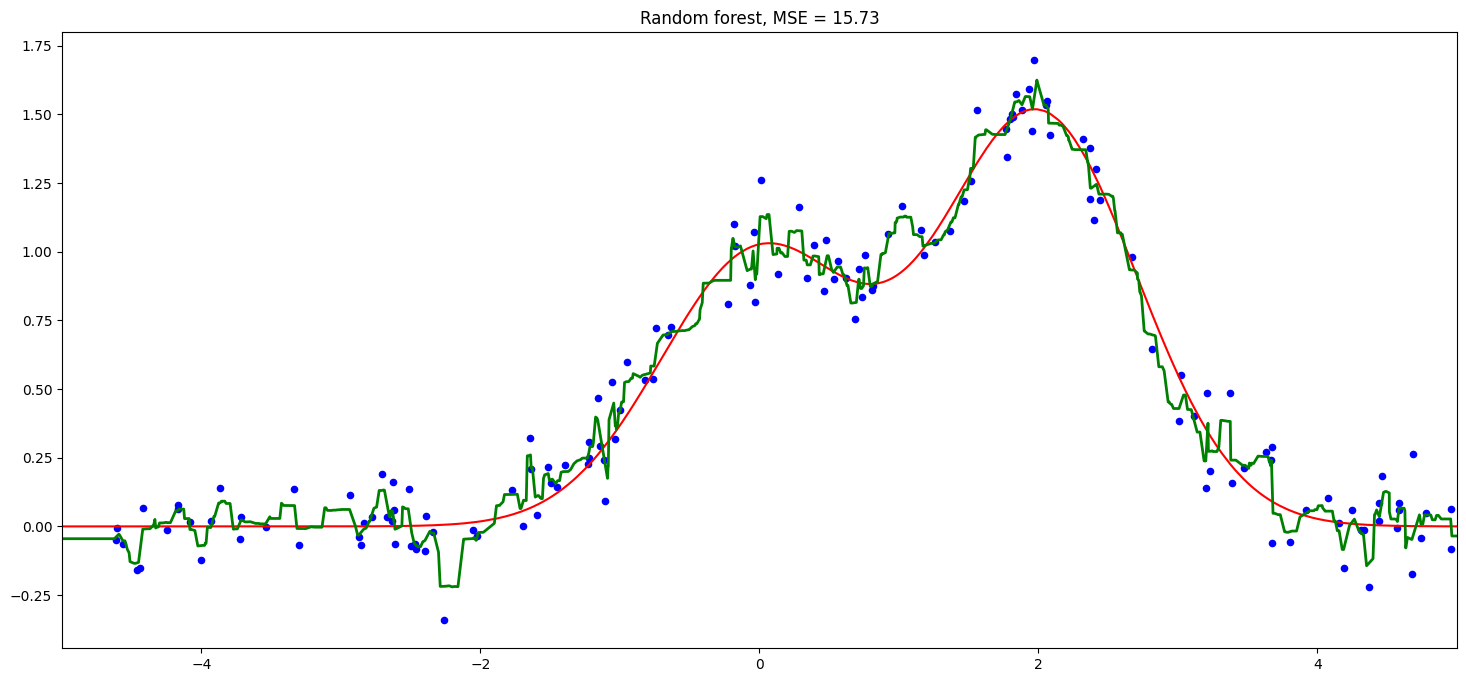

In [19]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

# Bagging vs RandomForest

In [22]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

df =pd.DataFrame(X,columns =['col1','col2','col3','col4','col5'])
df['target'] =y

print(df.shape)
df.head ()


(100, 6)


,col1,col2,col3,col4,col5,target
0,0.401873,-0.437787,1.953085,1.630885,0.110139,1
1,1.262070,-0.584419,-0.088990,2.548514,0.251091,0
2,1.502901,-0.894618,0.815272,2.455886,0.095270,1
3,1.061165,-1.493561,0.085903,3.484160,-0.718878,1
4,1.732605,-2.207140,0.945029,-1.141966,2.323374,1


In [30]:
from sklearn.ensemble import BaggingClassifier
bag =BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

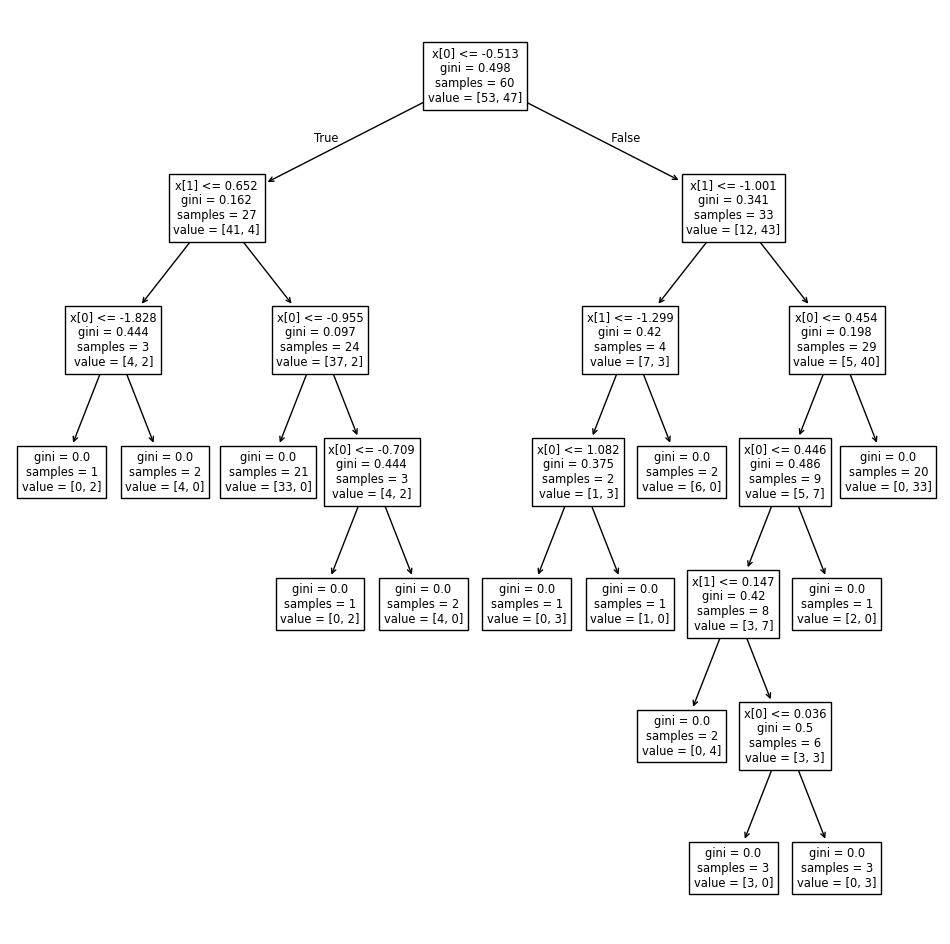

Watch the nodes  carefully


In [34]:
plt.figure(figsize=(12,12))
from sklearn.tree import plot_tree
plot_tree(bag.estimators_[0])
plt.show()
print("Watch the nodes  carefully")

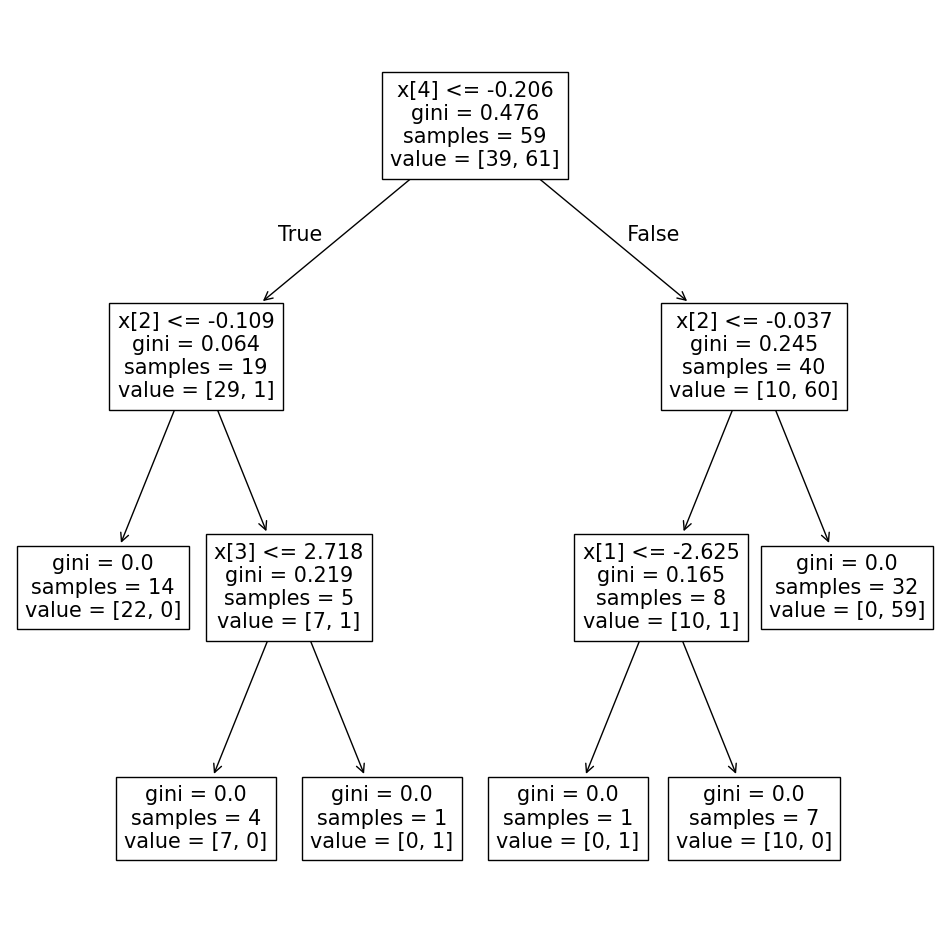

Watch the nodes  carefully


In [35]:
rf =RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])


plt.figure(figsize=(12,12))
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0])
plt.show()
print("Watch the nodes  carefully")

# Working on real dataset

In [36]:
df =pd.read_csv('dataset\heart (1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [38]:
X =df.iloc[:,0:-1]
y =df.iloc[:,-1]
X_train,X_test,Y_train,Y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)

(820, 13)
(205, 13)


In [40]:
rf =RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred =rf.predict(X_test)


from sklearn.metrics import r2_score
print("r2score",r2_score(Y_test,y_pred))

r2score 0.9414620217018846


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

gb =GradientBoostingClassifier()
lr =LogisticRegression()
svc =SVC()

gb.fit(X_train,Y_train)
gb_predict =gb.predict(X_test)

lr.fit(X_train,Y_train)
lr_pred =lr.predict(X_test)

svc.fit(X_train,Y_train)
svc_pred =svc.predict(X_test)

print("r2score  of GradientBoosting",r2_score(Y_test,gb_predict))
print("r2score  of LogisticRegression",r2_score(Y_test,lr_pred))
print("r2score  of SVC",r2_score(Y_test,svc_pred))
print("r2_score of Randomforest",r2_score(Y_test,y_pred))



r2score  of GradientBoosting 0.7268227679421282
r2score  of LogisticRegression 0.14144298496097452
r2score  of SVC -0.2683228631258332
r2_score of Randomforest 0.9414620217018846


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))

0.9970588235294118